# **🏠 부동산 실거래가 Baseline code**
> 부동산 실거래가 예측 대회에 오신 여러분 환영합니다! 🎉     
> 아래 baseline에서는 RandomForest를 활용해 ML 방법론들을 실제 대회에 적용해보도록 하겠습니다.
> 강의는 google colab으로 실행하였기에 아래의 베이스라인 코드와는 일부 차이가 있을 수 있습니다. 

## Contents
- Library Import
- Data Load
- Data Preprocessing
- Feature Engineering
- Model Training
- Inference
- Output File Save


## 1. Library Import
- 필요한 라이브러리를 불러옵니다.

In [60]:
%pip install eli5==0.13.0

# 한글 폰트 사용을 위한 라이브러리입니다.
!apt-get install -y fonts-nanum

Note: you may need to restart the kernel to use updated packages.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 54 not upgraded.


In [61]:
# visualization
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumBarunGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumBarunGothic'}) # 폰트 설정
plt.rc('font', family='NanumBarunGothic')
import seaborn as sns

# utils
import pandas as pd
import numpy as np
from tqdm import tqdm
import pickle
import warnings;warnings.filterwarnings('ignore')

# Model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# import eli5
# from eli5.sklearn import PermutationImportance

## 2. Data Load

#### 2.1. 데이터 로드

In [62]:
# 필요한 데이터를 load 하겠습니다. 경로는 환경에 맞게 지정해주면 됩니다.
train_path = './train.csv'
test_path  = './test.csv'
xy_path = './outputFinal.csv'
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)
xy = pd.read_csv(xy_path)

In [63]:
# Train data와 Test data shape은 아래와 같습니다.
train.shape, test.shape, xy.shape

((1118822, 52), (9272, 51), (1128094, 6))

In [64]:
# Train과 Test data를 살펴보겠습니다.
pd.set_option('display.max_columns', None) 
display(train.head(1))
display(test.head(1))      # 부동산 실거래가(=Target) column이 제외된 모습입니다.

,시군구,번지,본번,부번,아파트명,전용면적(㎡),계약년월,계약일,층,건축년도,도로명,해제사유발생일,등기신청일자,거래유형,중개사소재지,"k-단지분류(아파트,주상복합등등)",k-전화번호,k-팩스번호,단지소개기존clob,k-세대타입(분양형태),k-관리방식,k-복도유형,k-난방방식,k-전체동수,k-전체세대수,k-건설사(시공사),k-시행사,k-사용검사일-사용승인일,k-연면적,k-주거전용면적,k-관리비부과면적,k-전용면적별세대현황(60㎡이하),k-전용면적별세대현황(60㎡~85㎡이하),k-85㎡~135㎡이하,k-135㎡초과,k-홈페이지,k-등록일자,k-수정일자,고용보험관리번호,경비비관리형태,세대전기계약방법,청소비관리형태,건축면적,주차대수,기타/의무/임대/임의=1/2/3/4,단지승인일,사용허가여부,관리비 업로드,좌표X,좌표Y,단지신청일,target
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,8,3,1987,언주로 3,NaN,,-,-,아파트,025776611,025776673,NaN,분양,자치관리,계단식,개별난방,8.0,270.0,우성건설,모름,1987-11-21 00:00:00.0,22637.0,20204.0,22637.0,20.0,250.0,0.0,NaN,NaN,2022-11-09 20:10:43.0,2023-09-23 17:21:41.0,NaN,직영,단일계약,직영,4858.0,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,124000


,시군구,번지,본번,부번,아파트명,전용면적(㎡),계약년월,계약일,층,건축년도,도로명,해제사유발생일,등기신청일자,거래유형,중개사소재지,"k-단지분류(아파트,주상복합등등)",k-전화번호,k-팩스번호,단지소개기존clob,k-세대타입(분양형태),k-관리방식,k-복도유형,k-난방방식,k-전체동수,k-전체세대수,k-건설사(시공사),k-시행사,k-사용검사일-사용승인일,k-연면적,k-주거전용면적,k-관리비부과면적,k-전용면적별세대현황(60㎡이하),k-전용면적별세대현황(60㎡~85㎡이하),k-85㎡~135㎡이하,k-135㎡초과,k-홈페이지,k-등록일자,k-수정일자,고용보험관리번호,경비비관리형태,세대전기계약방법,청소비관리형태,건축면적,주차대수,기타/의무/임대/임의=1/2/3/4,단지승인일,사용허가여부,관리비 업로드,좌표X,좌표Y,단지신청일
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,202307,26,5,1987,언주로 3,NaN,,직거래,-,아파트,025776611,025776673,NaN,분양,자치관리,계단식,개별난방,8.0,270.0,우성건설,모름,1987-11-21 00:00:00.0,22637.0,20204.0,22637.0,20.0,250.0,0.0,NaN,NaN,2022-11-09 20:10:43.0,2023-09-23 17:21:41.0,NaN,직영,단일계약,직영,4858.0,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0


## 3. Data Preprocessing

- 모델링 전에 데이터 내 결측치, 이상치 등을 제거하고 범주형과 연속형 변수를 살펴보도록 하겠습니다!
- 먼저, 용이한 전처리를 위해 train과 test data를 합친 하나의 데이터로 진행하도록 하겠습니다.

In [65]:
# train/test 구분을 위한 칼럼을 하나 만들어 줍니다.
train['is_test'] = 0
test['is_test'] = 1
concat = pd.concat([train, test])     # 하나의 데이터로 만들어줍니다.

In [66]:
concat.shape

(1128094, 53)

In [67]:
xy_renamed = xy.rename(columns={
    '좌표X': '좌표X_1',
    '좌표Y': '좌표Y_1', 
    '시군구': '시군구_1',
    '번지': '번지_1',
    '도로명': '도로명_1',
    '주소': '주소_1'
})

In [68]:
concat.head(1)
# xy_renamed.head(1)

,시군구,번지,본번,부번,아파트명,전용면적(㎡),계약년월,계약일,층,건축년도,도로명,해제사유발생일,등기신청일자,거래유형,중개사소재지,"k-단지분류(아파트,주상복합등등)",k-전화번호,k-팩스번호,단지소개기존clob,k-세대타입(분양형태),k-관리방식,k-복도유형,k-난방방식,k-전체동수,k-전체세대수,k-건설사(시공사),k-시행사,k-사용검사일-사용승인일,k-연면적,k-주거전용면적,k-관리비부과면적,k-전용면적별세대현황(60㎡이하),k-전용면적별세대현황(60㎡~85㎡이하),k-85㎡~135㎡이하,k-135㎡초과,k-홈페이지,k-등록일자,k-수정일자,고용보험관리번호,경비비관리형태,세대전기계약방법,청소비관리형태,건축면적,주차대수,기타/의무/임대/임의=1/2/3/4,단지승인일,사용허가여부,관리비 업로드,좌표X,좌표Y,단지신청일,target,is_test
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,8,3,1987,언주로 3,NaN,,-,-,아파트,025776611,025776673,NaN,분양,자치관리,계단식,개별난방,8.0,270.0,우성건설,모름,1987-11-21 00:00:00.0,22637.0,20204.0,22637.0,20.0,250.0,0.0,NaN,NaN,2022-11-09 20:10:43.0,2023-09-23 17:21:41.0,NaN,직영,단일계약,직영,4858.0,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,124000.0,0


In [69]:
# 1. 인덱스 리셋. 
concat = concat.reset_index(drop=True)  
xy_renamed = xy_renamed.reset_index(drop=True)

# 2. 데이터프레임 병합
concat_xy = pd.concat([concat, xy_renamed], axis=1)

# 3. 결과 확인
print("병합 결과 shape:", concat_xy.shape)

병합 결과 shape: (1128094, 59)


In [70]:
concat_xy.iloc[2000:2100]

,시군구,번지,본번,부번,아파트명,전용면적(㎡),계약년월,계약일,층,건축년도,도로명,해제사유발생일,등기신청일자,거래유형,중개사소재지,"k-단지분류(아파트,주상복합등등)",k-전화번호,k-팩스번호,단지소개기존clob,k-세대타입(분양형태),k-관리방식,k-복도유형,k-난방방식,k-전체동수,k-전체세대수,k-건설사(시공사),k-시행사,k-사용검사일-사용승인일,k-연면적,k-주거전용면적,k-관리비부과면적,k-전용면적별세대현황(60㎡이하),k-전용면적별세대현황(60㎡~85㎡이하),k-85㎡~135㎡이하,k-135㎡초과,k-홈페이지,k-등록일자,k-수정일자,고용보험관리번호,경비비관리형태,세대전기계약방법,청소비관리형태,건축면적,주차대수,기타/의무/임대/임의=1/2/3/4,단지승인일,사용허가여부,관리비 업로드,좌표X,좌표Y,단지신청일,target,is_test,시군구_1,번지_1,도로명_1,좌표X_1,좌표Y_1,주소_1
2000,서울특별시 강남구 도곡동,955,955.0,0.0,도곡그린빌,48.48,201711,25,2,1995,강남대로44길 24,NaN,,-,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36000.0,0,서울특별시 강남구 도곡동,955,강남대로44길 24,127.063356,37.501358,서울특별시 강남구 도곡동 강남대로44길 24
2001,서울특별시 강남구 도곡동,955,955.0,0.0,도곡그린빌,48.48,201807,14,2,1995,강남대로44길 24,NaN,,-,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38000.0,0,서울특별시 강남구 도곡동,955,강남대로44길 24,127.063356,37.501358,서울특별시 강남구 도곡동 강남대로44길 24
2002,서울특별시 강남구 도곡동,957-11,957.0,11.0,도곡스타클래스,111.38,201710,23,6,2007,남부순환로 2615,NaN,,-,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88000.0,0,서울특별시 강남구 도곡동,957-11,남부순환로 2615,127.063356,37.501358,서울특별시 강남구 도곡동 남부순환로 2615
2003,서울특별시 강남구 도곡동,957-11,957.0,11.0,도곡스타클래스,112.75,201711,12,5,2007,남부순환로 2615,NaN,,-,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88000.0,0,서울특별시 강남구 도곡동,957-11,남부순환로 2615,127.063356,37.501358,서울특별시 강남구 도곡동 남부순환로 2615
2004,서울특별시 강남구 도곡동,957-11,957.0,11.0,도곡스타클래스,112.75,201711,18,16,2007,남부순환로 2615,NaN,,-,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91000.0,0,서울특별시 강남구 도곡동,957-11,남부순환로 2615,127.063356,37.501358,서울특별시 강남구 도곡동 남부순환로 2615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,서울특별시 강남구 세곡동,525,525.0,0.0,강남데시앙파크,114.69,201801,3,5,2011,헌릉로590길 63,NaN,,-,-,아파트,024517070,024517088,NaN,기타,위탁관리,계단식,개별난방,15.0,546.0,태영건설,SH공사,2011-11-01 00:00:00.0,101633.0,52989.0,67648.0,44.0,243.0,259.0,NaN,NaN,NaN,2023-09-23 18:06:53.0,NaN,위탁,단일계약,위탁,10210.4,850.0,의무,2015-11-24 12:58:45.0,Y,N,127.101188,37.460289,2013-03-07 09:46:45.0,95000.0,0,서울특별시 강남구 세곡동,525,헌릉로590길 63,127.063356,37.501358,서울특별시 강남구 세곡동 헌릉로590길 63
2096,서울특별시 강남구 세곡동,525,525.0,0.0,강남데시앙파크,84.95,201801,4,10,2011,헌릉로590길 63,NaN,,-,-,아파트,024517070,024517088,NaN,기타,위탁관리,계단식,개별난방,15.0,546.0,태영건설,SH공사,2011-11-01 00:00:00.0,101633.0,52989.0,67648.0,44.0,243.0,259.0,NaN,NaN,NaN,2023-09-23 18:06:53.0,NaN,위탁,단일계약,위탁,10210.4,850.0,의무,2015-11-24 12:58:45.0,Y,N,127.101188,37.460289,2013-03-07 09:46:45.0,83000.0,0,서울특별시 강남구 세곡동,525,헌릉로590길 63,127.063356,37.501358,서울특별시 강남구 세곡동 헌릉로590길 63
2097,서울특별시 강남구 세곡동,525,525.0,0.0,강남데시앙파크,114.69,201801,6,8,2011,헌릉로590길 63,NaN,,-,-,아파트,024517070,024517088,NaN,기타,위탁관리,계단식,개별난방,15.0,546.0,태영건설,SH공사,2011-11-01 00:00:00.0,101633.0,52989.0,67648.0,44.0,243.0,259.0,NaN,NaN,NaN,2023-09-23 18:06:53.0,NaN,위탁,단일계약,위탁,10210.4,850.0,의무,2015-11-24 12:58:45.0,Y,N,127.101188,37.460289,2013-03-07 09:46:45.0,94500.0,0,서울특별시 강남구 세곡동,525,헌릉로590길 63,127.063356,37.501358,서울특별시 강남구 세곡동 헌릉로590길 63
2098,서울특별시 강남구 세곡동,525,525.0,0.0,강남데시앙파크,84.95,201801,11,5,2011,헌릉로590길 63,NaN,,-,-,아파트,024517070,024517088,NaN,기타,위탁관리,계단식,개별난방,15.0,546.0,태영건설,SH공사,2011-11-01 00:00:00.0,101633.0,52989.0,67648.0,44.0,243.0,259.0,NaN,NaN,NaN,2023-09-23 18:06:53.0,NaN,위탁,단일계약,위탁,10210.4,850.0,의무,2015-11-24 12:58:45.0,Y,N,127.101188,37.460289,2013-03-07 09:46:45.0,84000.0,0,서울특별시 강남구 세곡동,525,헌릉로590길 63,127.063356,37.501358,서울특별시

In [71]:
concat_xy['is_test'].value_counts()      # train과 test data가 하나로 합쳐진 것을 확인할 수 있습니다.

0    1118822
1       9272
Name: is_test, dtype: int64

##### 중간 저장

In [72]:
###### 중간 저장
concat_xy.to_csv('concat_xy.csv', 
    index=False,
    encoding='utf-8-sig'  # 한글 깨짐 방지
)


In [73]:
dt_xy = pd.read_csv('concat_xy.csv')

In [74]:
dt_xy.info()
dt_xy.head(1)
dt_xy = dt_xy.rename(columns={
    '전용면적(㎡)': '전용면적',
    'k-단지분류(아파트,주상복합등등)': '단지분류', 
    'k-전화번호': '전화번호', 
    'k-팩스번호': '팩스번호',
    'k-세대타입(분양형태)': '세대타입',
    'k-관리방식': '관리방식',
    'k-복도유형': '복도유형', 
    'k-난방방식': '난방방식',
    'k-전체동수': '전체동수', 
    'k-전체세대수': '전체세대수',
    'k-건설사(시공사)': '건설사',
    'k-시행사': '시행사',
    'k-사용검사일-사용승인일': '사용검사일_사용승인일',  # Added missing comma here
    'k-연면적': '연면적',
    'k-주거전용면적': '주거전용면적',
    'k-관리비부과면적': '관리비부과면적',
    'k-전용면적별세대현황(60㎡이하)': '전용면적60',
    'k-전용면적별세대현황(60㎡~85㎡이하)': '전용면적60_85',
    'k-85㎡~135㎡이하': '전용면적85_135',
    'k-135㎡초과': '전용면적135', 
    'k-홈페이지': '홈페이지',
    'k-등록일자': '등록일자', 
    'k-수정일자': '수정일자',
    '기타/의무/임대/임의=1/2/3/4': '기의임임',
    '관리비 업로드': '관리비업로드'
})

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128094 entries, 0 to 1128093
Data columns (total 59 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   시군구                     1128094 non-null  object 
 1   번지                      1127867 non-null  object 
 2   본번                      1128019 non-null  float64
 3   부번                      1128019 non-null  float64
 4   아파트명                    1125958 non-null  object 
 5   전용면적(㎡)                 1128094 non-null  float64
 6   계약년월                    1128094 non-null  int64  
 7   계약일                     1128094 non-null  int64  
 8   층                       1128094 non-null  int64  
 9   건축년도                    1128094 non-null  int64  
 10  도로명                     1128094 non-null  object 
 11  해제사유발생일                 6195 non-null     float64
 12  등기신청일자                  1128094 non-null  object 
 13  거래유형                    1128094 non-null  object 
 14  중개

In [75]:
display(dt_xy2.info())
display(dt_xy2.isna().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128094 entries, 0 to 1128093
Data columns (total 45 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   번지          1127867 non-null  object 
 1   본번          1128019 non-null  float64
 2   부번          1128019 non-null  float64
 3   아파트명        1128088 non-null  object 
 4   전용면적        1128094 non-null  float64
 5   층           1128094 non-null  int64  
 6   건축년도        1128094 non-null  int64  
 7   도로명         1128094 non-null  object 
 8   등기신청일자      1128094 non-null  object 
 9   거래유형        1128094 non-null  object 
 10  단지분류        1128094 non-null  object 
 11  세대타입        1128094 non-null  object 
 12  관리방식        251969 non-null   object 
 13  복도유형        251640 non-null   object 
 14  난방방식        251969 non-null   object 
 15  전체동수        250887 non-null   float64
 16  전체세대수       251969 non-null   float64
 17  건설사         250457 non-null   object 
 18  시행사         250260 non

None

번지               227
본번                75
부번                75
아파트명               6
전용면적               0
층                  0
건축년도               0
도로명                0
등기신청일자             0
거래유형               0
단지분류               0
세대타입               0
관리방식          876125
복도유형          876454
난방방식          876125
전체동수          877207
전체세대수         876125
건설사           877637
시행사           877834
연면적           876125
주거전용면적        876170
관리비부과면적       876125
전용면적60        876170
전용면적60_85     876170
전용면적85_135    876170
고용보험관리번호      920757
경비비관리형태       877561
세대전기계약방법      885389
청소비관리형태       877751
건축면적          876279
주차대수          876277
기의임임          876125
단지승인일         876854
사용허가여부        876125
관리비업로드        876125
단지신청일         876187
target          9272
is_test            0
좌표X_1              0
좌표Y_1              0
주소_1               0
구                  0
동                  0
계약년                0
계약월                0
dtype: int64

In [76]:
# 시군구, 년월 등 분할할 수 있는 변수들은 세부사항 고려를 용이하게 하기 위해 모두 분할해 주겠습니다.
dt_xy['구'] = dt_xy['시군구'].map(lambda x : x.split()[1])
dt_xy['동'] = dt_xy['시군구'].map(lambda x : x.split()[2])
del dt_xy['시군구']

dt_xy['계약년'] = dt_xy['계약년월'].astype('str').map(lambda x : x[:4])
dt_xy['계약월'] = dt_xy['계약년월'].astype('str').map(lambda x : x[4:])
del dt_xy['계약년월']

In [116]:
# 해제사유발생일,단지소개기존clob, 계약일, 중개사소재지, 전화번호, 팩스번호, 사용검사일_사용승인일, 전용면적135, 홈페이지, 등록일자, 수정일자,
# 무의미: 관리방식, 거래유형, 고용보험관리번호, 경비비관리형태, 세대전기계약방법, 기의임임, 청소비관리형태

dt_xy2 = dt_xy.drop(columns=['해제사유발생일', '단지소개기존clob', '계약일', '중개사소재지', '전화번호', 
                                '팩스번호', '사용검사일_사용승인일', '전용면적135', '홈페이지', '등록일자', '수정일자',
                                '시군구_1', '번지_1', '도로명_1','시군구_1','좌표X', '좌표Y'])

### 3.1. 결측치 탐색 및 보간
- 결측치를 처리할 때 많이 쓰는 방법은 삭제(Deletion)과 대체(Imputation) 입니다.
- 본 Baseline에서는 결측치가 90% 이상을 차지하는 변수의 결측치는 제거하고, 나머지 결측치는 대체하도록 하겠습니다.
  - 연속형 변수의 경우에는 선형보간(Linear interpolation)으로 대체하겠습니다.
  - 범주형 변수의 경우에는 'NULL' 이라는 임의의 범주로 대체해주도록 하겠습니다.

- 참고 ✅
  - 선형보간(Linear interpolation)이란 두 점의 값이 주어졌을 때 **그 사이의 값**을 추정하기 위해 직선 거리에 따라 선형적으로 계산하는 방법입니다.
  - 아래 두개의 붉은 점 사이에 ($x$, $y$) 값을 추정하기 위해, 해당 점이 두 붉은 점을 이은 선형적인 선분에 있다고 가정하고, 단순 비례식으로 ($x$, $y$)를 추정해 보간하는 방법입니다.
  - [참고자료](https://ko.wikipedia.org/wiki/%EC%84%A0%ED%98%95_%EB%B3%B4%EA%B0%84%EB%B2%95#:~:text=%EC%84%A0%ED%98%95%20%EB%B3%B4%EA%B0%84%EB%B2%95(%E7%B7%9A%E5%9E%8B%E8%A3%9C%E9%96%93%E6%B3%95,%EC%9C%BC%EB%A1%9C%20%EA%B3%84%EC%82%B0%ED%95%98%EB%8A%94%20%EB%B0%A9%EB%B2%95%EC%9D%B4%EB%8B%A4.)


> 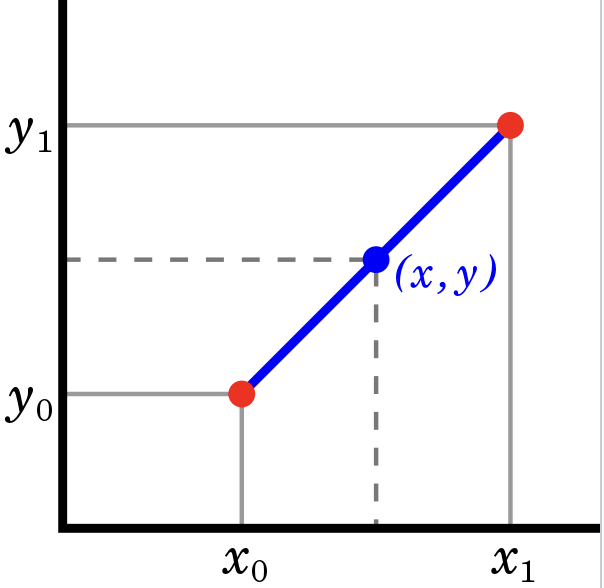

In [117]:
dt_xy2['target'].describe()

count    1.118822e+06
mean     5.799153e+04
std      4.642602e+04
min      3.500000e+02
25%      3.050000e+04
50%      4.480000e+04
75%      6.980000e+04
max      1.450000e+06
Name: target, dtype: float64

In [118]:
# 1. 구와 동별로 가장 많이 등장하는 아파트명을 찾습니다
most_frequent_apt = dt_xy2.groupby(['동', '좌표X_1', '좌표Y_1'])['아파트명'].agg(
    lambda x: x.mode().iloc[0] if not x.mode().empty else None
).reset_index()

# 2. 결측치를 채웁니다
for idx, row in most_frequent_apt.iterrows():
    if row['아파트명'] is not None:
        mask = (dt_xy2['동'] == row['동']) & \
            (dt_xy2['좌표X_1'] == row['좌표X_1']) & \
            (dt_xy2['좌표Y_1'] == row['좌표Y_1']) & \
            (dt_xy2['아파트명'].isna())
        dt_xy2.loc[mask, '아파트명'] = row['아파트명']

# 3. 결과 확인
print("처리 전 아파트명 결측치:", dt_xy2['아파트명'].isnull().sum())
print("\n동, 본번, 부번별 대표 아파트명 예시:")
print(most_frequent_apt.head())

처리 전 아파트명 결측치: 6

동, 본번, 부번별 대표 아파트명 예시:
     동       좌표X_1      좌표Y_1     아파트명
0  가락동  127.063356  37.501358     가락쌍용
1  가락동  127.102497  37.497610    헬리오시티
2  가락동  127.116371  37.496358     가락금호
3  가락동  127.121931  37.494825  한화오벨리스크
4  가락동  127.128597  37.493800     가락미륭


#### 중간 점검

In [131]:
dt_xy3 = dt_xy2.copy()

In [314]:
dt_xy3[dt_xy3['is_test']==1].isnull().sum()

번지               2
본번               0
부번               0
아파트명             0
전용면적             0
층                0
건축년도             0
도로명              0
등기신청일자           0
거래유형             0
단지분류             0
세대타입             0
관리방식             0
복도유형             0
난방방식             0
전체동수             0
전체세대수            0
건설사              0
시행사              0
연면적           6562
주거전용면적        6562
관리비부과면적       6562
전용면적60        6562
전용면적60_85     6562
전용면적85_135    6562
고용보험관리번호      7453
경비비관리형태        238
세대전기계약방법       274
청소비관리형태        238
건축면적          6565
주차대수          6340
기의임임           231
단지승인일         6568
사용허가여부        6562
관리비업로드         191
단지신청일         6562
target        9272
is_test          0
좌표X_1            0
좌표Y_1            0
주소_1             0
구                0
동                0
계약년              0
계약월              0
dtype: int64

In [286]:
dt_xy3.isnull().sum()

번지               227
본번                75
부번                75
아파트명               0
전용면적               0
층                  0
건축년도               0
도로명                0
등기신청일자             0
거래유형               0
단지분류              73
세대타입               0
관리방식             123
복도유형             632
난방방식             305
전체동수               0
전체세대수              0
건설사              140
시행사              140
연면적           876125
주거전용면적        876170
관리비부과면적       876125
전용면적60        876170
전용면적60_85     876170
전용면적85_135    876170
고용보험관리번호      920757
경비비관리형태        32972
세대전기계약방법       41248
청소비관리형태        33162
건축면적          876279
주차대수          837515
기의임임           31607
단지승인일         876854
사용허가여부        876125
관리비업로드         25143
단지신청일         876187
target          9272
is_test            0
좌표X_1              0
좌표Y_1              0
주소_1               0
구                  0
동                  0
계약년                0
계약월                0
dtype: int64

In [313]:
mode_values = dt_xy3.groupby(['동'])['건설사'].transform(
    lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else np.nan)

dt_xy3['건설사'] = dt_xy3['시행사'].fillna(mode_values)

In [287]:
dt_xy3['전체동수'].value_counts()

10.0     676889
28.0      90465
2.0       55904
1.0       53811
3.0       36049
8.0       22816
4.0       22810
6.0       16381
5.0       15499
15.0      14132
9.0       12230
7.0       11874
12.0      11210
14.0       9892
11.0       8204
13.0       7089
19.0       6635
16.0       4709
22.0       4249
31.0       4009
32.0       3878
23.0       3248
44.0       3117
72.0       3068
124.0      2816
30.0       2627
56.0       2605
20.0       2486
33.0       2385
34.0       2208
17.0       1708
24.0       1705
18.0       1617
51.0       1513
40.0       1504
21.0       1382
50.0       1370
37.0       1028
26.0        827
978.0       591
84.0        549
41.0        514
114.0       132
144.0        90
127.0        83
83.0         73
74.0         61
137.0        52
Name: 전체동수, dtype: int64

In [288]:
# 먼저, 연속형 변수와 범주형 변수를 위 info에 따라 분리해주겠습니다.
continuous_columns = []
categorical_columns = []

for column in dt_xy3.columns:
    if pd.api.types.is_numeric_dtype(dt_xy3[column]):
        continuous_columns.append(column)
    else:
        categorical_columns.append(column)

print("연속형 변수:", continuous_columns)
print("범주형 변수:", categorical_columns)

연속형 변수: ['본번', '부번', '전용면적', '층', '건축년도', '전체동수', '전체세대수', '연면적', '주거전용면적', '관리비부과면적', '전용면적60', '전용면적60_85', '전용면적85_135', '건축면적', '주차대수', 'target', 'is_test', '좌표X_1', '좌표Y_1']
범주형 변수: ['번지', '아파트명', '도로명', '등기신청일자', '거래유형', '단지분류', '세대타입', '관리방식', '복도유형', '난방방식', '건설사', '시행사', '고용보험관리번호', '경비비관리형태', '세대전기계약방법', '청소비관리형태', '기의임임', '단지승인일', '사용허가여부', '관리비업로드', '단지신청일', '주소_1', '구', '동', '계약년', '계약월']


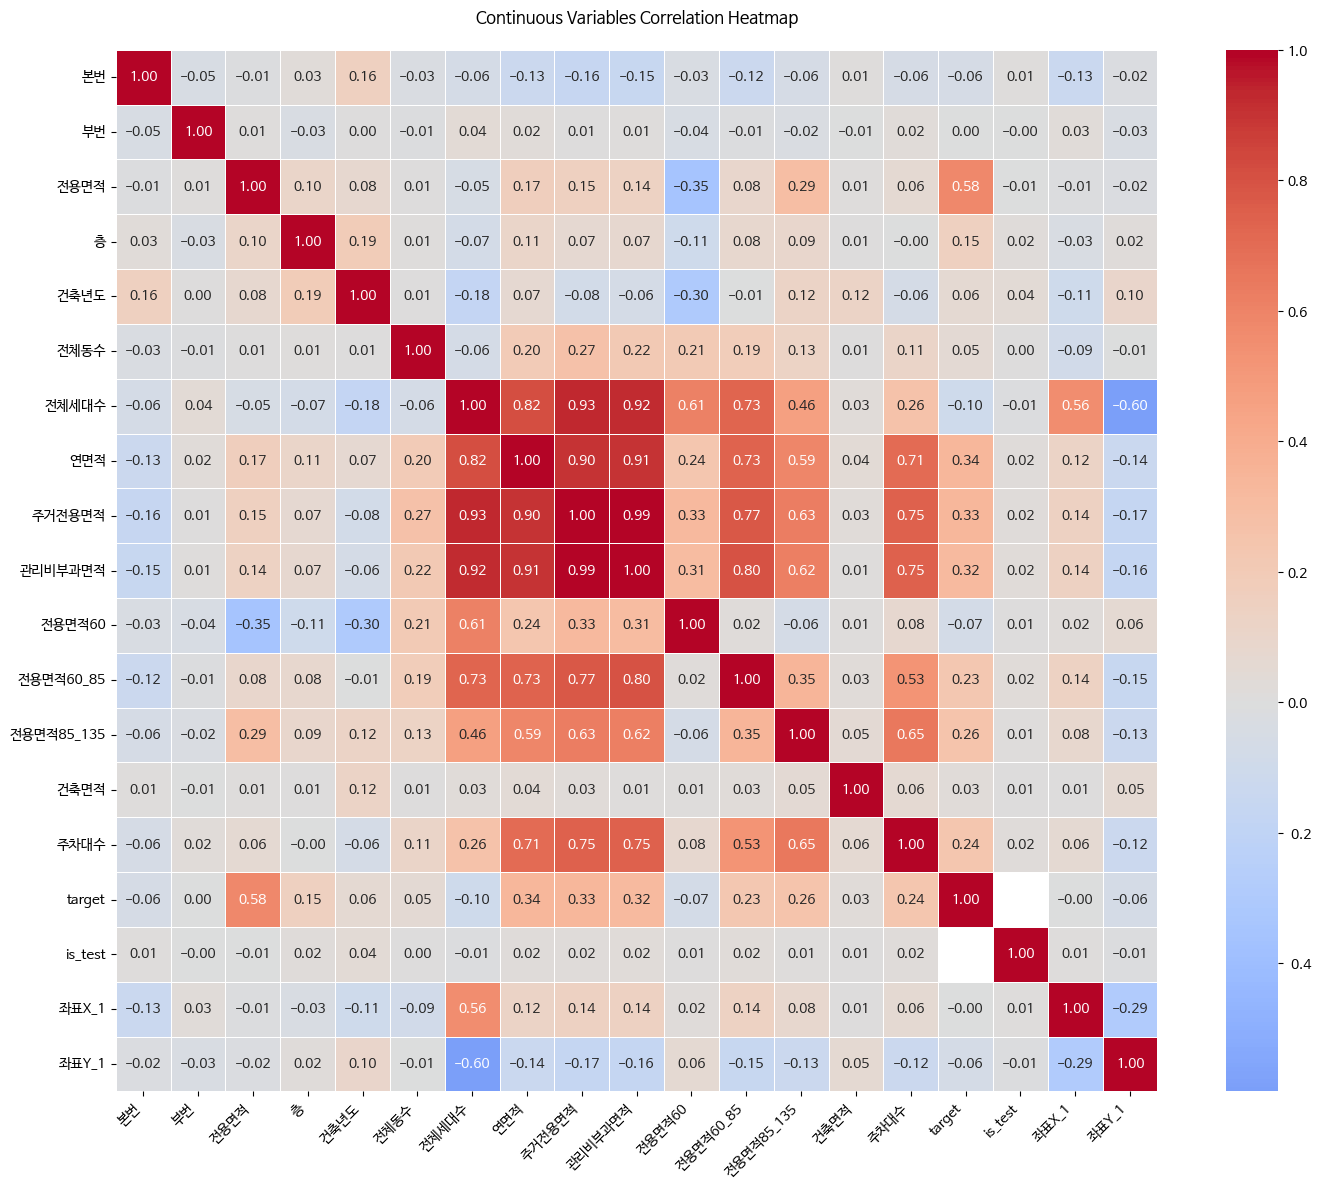

In [369]:
# 연속형 변수들의 상관관계 계산
correlation_matrix = dt_xy3[continuous_columns].corr()

# 시각화를 위한 figure 크기 설정
plt.figure(figsize=(15, 12))

# heatmap 생성
sns.heatmap(correlation_matrix, 
            annot=True,              # 상관계수 값 표시
            cmap='coolwarm',         # 색상 맵 설정
            center=0,                # 0을 기준으로 색상 대비
            fmt='.2f',              # 소수점 2자리까지 표시
            square=True,            # 정사각형 형태로 표시
            linewidths=0.5)         # 격자 선 두께

# 제목 설정
plt.title('Continuous Variables Correlation Heatmap', pad=20)

# x축 레이블 회전
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# 레이아웃 조정
plt.tight_layout()

plt.show()

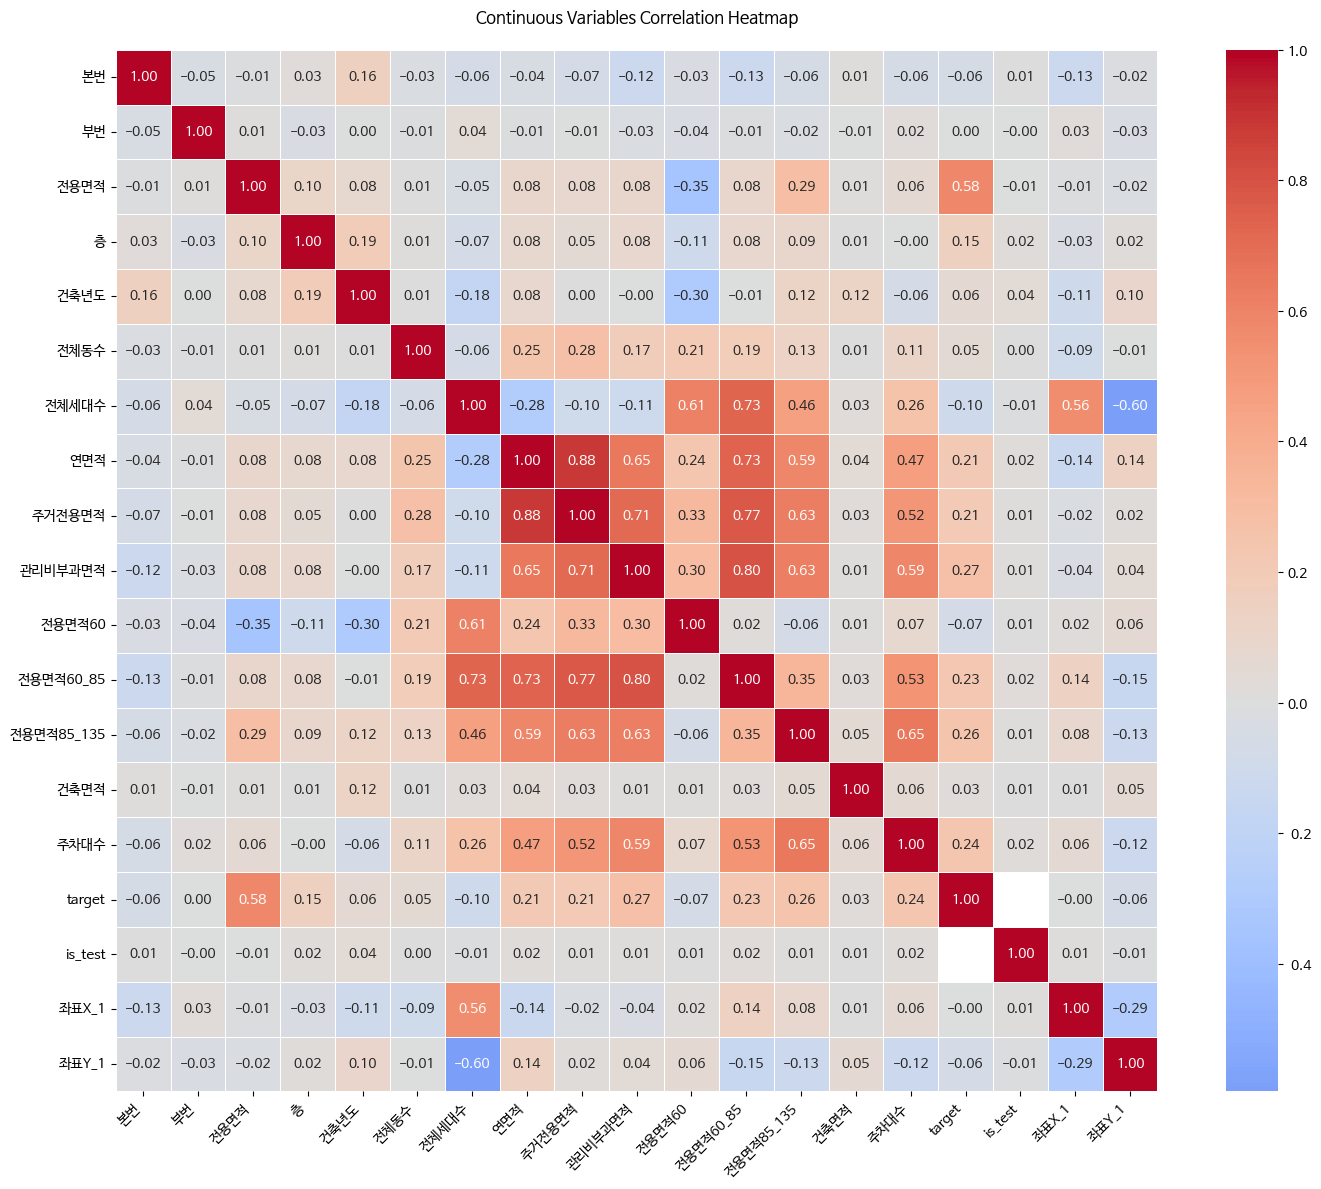

In [370]:
# 연속형 변수들의 상관관계 계산
correlation_matrix = dt_xy4[continuous_columns].corr()

# 시각화를 위한 figure 크기 설정
plt.figure(figsize=(15, 12))

# heatmap 생성
sns.heatmap(correlation_matrix, 
            annot=True,              # 상관계수 값 표시
            cmap='coolwarm',         # 색상 맵 설정
            center=0,                # 0을 기준으로 색상 대비
            fmt='.2f',              # 소수점 2자리까지 표시
            square=True,            # 정사각형 형태로 표시
            linewidths=0.5)         # 격자 선 두께

# 제목 설정
plt.title('Continuous Variables Correlation Heatmap', pad=20)

# x축 레이블 회전
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# 레이아웃 조정
plt.tight_layout()

plt.show()

In [291]:
print("제거 전 데이터 크기:", dt_xy3.shape)

제거 전 데이터 크기: (1128094, 45)


In [321]:
del_col = ['단지분류', '복도유형', '관리방식', '난방방식', '건설사', '시행사']

# 초기값 설정
dt_xy4 = dt_xy3.copy()

# 각 컬럼별로 순차적으로 결측치 제거
for col in del_col:
    dt_xy4 = dt_xy4[~((dt_xy4['is_test']==0) & (dt_xy4[col].isna()))]
    print(f"{col} 결측치 제거 후 데이터 크기:", dt_xy4.shape)

# 최종 결측치 확인
print("\n최종 결측치 현황:")
print(dt_xy4.isnull().sum())

단지분류 결측치 제거 후 데이터 크기: (1128021, 45)
복도유형 결측치 제거 후 데이터 크기: (1127694, 45)
관리방식 결측치 제거 후 데이터 크기: (1127694, 45)
난방방식 결측치 제거 후 데이터 크기: (1127694, 45)
건설사 결측치 제거 후 데이터 크기: (1127694, 45)
시행사 결측치 제거 후 데이터 크기: (1127694, 45)

최종 결측치 현황:
번지               227
본번                75
부번                75
아파트명               0
전용면적               0
층                  0
건축년도               0
도로명                0
등기신청일자             0
거래유형               0
단지분류               0
세대타입               0
관리방식               0
복도유형               0
난방방식               0
전체동수               0
전체세대수              0
건설사                0
시행사                0
연면적           876125
주거전용면적        876170
관리비부과면적       876125
전용면적60        876170
전용면적60_85     876170
전용면적85_135    876170
고용보험관리번호      920684
경비비관리형태        32972
세대전기계약방법       41248
청소비관리형태        33162
건축면적          876279
주차대수          837515
기의임임           31607
단지승인일         876854
사용허가여부        876125
관리비업로드         25143
단지신청일         876187
target          92

In [319]:
dt_xy4['전용면적'].describe()

count    1.127694e+06
mean     7.715111e+01
std      2.936287e+01
min      1.002000e+01
25%      5.965000e+01
50%      8.184000e+01
75%      8.496000e+01
max      4.243200e+02
Name: 전용면적, dtype: float64

In [331]:
print(dt_xy4.isnull().sum())

번지               227
본번                75
부번                75
아파트명               0
전용면적               0
층                  0
건축년도               0
도로명                0
등기신청일자             0
거래유형               0
단지분류               0
세대타입               0
관리방식               0
복도유형               0
난방방식               0
전체동수               0
전체세대수              0
건설사                0
시행사                0
연면적           844432
주거전용면적        876170
관리비부과면적       876125
전용면적60        876170
전용면적60_85     876170
전용면적85_135    876170
고용보험관리번호      920684
경비비관리형태        32972
세대전기계약방법       41248
청소비관리형태        33162
건축면적          876279
주차대수          837515
기의임임           31607
단지승인일         876854
사용허가여부        876125
관리비업로드         25143
단지신청일         876187
target          9272
is_test            0
좌표X_1              0
좌표Y_1              0
주소_1               0
구                  0
동                  0
계약년                0
계약월                0
dtype: int64


In [368]:
# 연면적 결측치가 있는 행 추출
null_rows = dt_xy4[dt_xy4['연면적'].isna()]

# 기본 정보 출력
print("연면적 결측치 개수:", len(null_rows))
print("\n결측치가 있는 데이터의 분포:")
print(null_rows['is_test'].value_counts())

# 주요 컬럼들만 선택하여 결측치 데이터 확인
important_cols = ['아파트명', '동', '구', '건축년도', '전체동수', '전체세대수', 
                 '연면적', '주거전용면적', '관리비부과면적', '좌표X_1', '좌표Y_1']

print("\n결측치 데이터 샘플:")
display(null_rows[important_cols].iloc[22000:22100])

# 결측치가 있는 행들의 다른 컬럼 결측치 현황
print("\n해당 행들의 전체 컬럼 결측치 현황:")
print(null_rows.isnull().sum().sort_values(ascending=False))

# 연면적 결측치가 있는 아파트들의 분포
print("\n연면적 결측치가 있는 아파트 빈도:")
print(null_rows['아파트명'].value_counts().head())

연면적 결측치 개수: 0

결측치가 있는 데이터의 분포:
Series([], Name: is_test, dtype: int64)

결측치 데이터 샘플:


,아파트명,동,구,건축년도,전체동수,전체세대수,연면적,주거전용면적,관리비부과면적,좌표X_1,좌표Y_1



해당 행들의 전체 컬럼 결측치 현황:
번지            0.0
전용면적60_85     0.0
고용보험관리번호      0.0
경비비관리형태       0.0
세대전기계약방법      0.0
청소비관리형태       0.0
건축면적          0.0
주차대수          0.0
기의임임          0.0
단지승인일         0.0
사용허가여부        0.0
관리비업로드        0.0
단지신청일         0.0
target        0.0
is_test       0.0
좌표X_1         0.0
좌표Y_1         0.0
주소_1          0.0
구             0.0
동             0.0
계약년           0.0
전용면적85_135    0.0
전용면적60        0.0
본번            0.0
관리비부과면적       0.0
부번            0.0
아파트명          0.0
전용면적          0.0
층             0.0
건축년도          0.0
도로명           0.0
등기신청일자        0.0
거래유형          0.0
단지분류          0.0
세대타입          0.0
관리방식          0.0
복도유형          0.0
난방방식          0.0
전체동수          0.0
전체세대수         0.0
건설사           0.0
시행사           0.0
연면적           0.0
주거전용면적        0.0
계약월           0.0
dtype: float64

연면적 결측치가 있는 아파트 빈도:
Series([], Name: 아파트명, dtype: int64)


In [355]:
# 1. 아파트명과 건축년도로 그룹화하여 연면적의 평균 구하기
group_mean = dt_xy4.groupby(['아파트명', '동', '구'])['관리비부과면적'].transform('mean')

# 2. 결측치 채우기 (순차적으로 적용)
dt_xy4['관리비부과면적'] = dt_xy4['관리비부과면적'].fillna(group_mean)  # 같은 아파트, 같은 건축년도의 평균으로 채움

# # 3. 여전히 남아있는 결측치는 건축년도별 평균으로 채움
# year_mean = dt_xy4.groupby('건축년도')['연면적'].transform('mean')
# dt_xy4['연면적'] = dt_xy4['연면적'].fillna(year_mean)

# # 4. 마지막으로 남은 결측치는 전체 평균으로 채움
# total_mean = dt_xy4['연면적'].mean()
# dt_xy4['연면적'] = dt_xy4['연면적'].fillna(total_mean)

# 결측치 처리 전후 확인
print("결측치 처리 완료 여부:", dt_xy4['관리비부과면적'].isnull().sum())

결측치 처리 완료 여부: 842187


In [366]:
# 1. 가장 구체적인 그룹부터 시작하여 점차 일반적인 그룹으로 확장
def fill_missing_hierarchical(df, target_col):
    df_copy = df.copy()
    
    # 1단계: 동일 아파트, 동, 구의 평균
    group_mean_1 = df_copy.groupby(['아파트명', '동', '구'])[target_col].transform('mean')
    df_copy[target_col] = df_copy[target_col].fillna(group_mean_1)
    
    # 1단계: 동일 아파트, 동, 구의 평균
    group_mean_2 = df_copy.groupby(['아파트명', '좌표X_1', '좌표Y_1'])[target_col].transform('mean')
    df_copy[target_col] = df_copy[target_col].fillna(group_mean_2)

    # # 1단계: 동일 아파트, 동, 구의 평균
    # group_mean_3 = df_copy.groupby(['동', '좌표X_1', '좌표Y_1'])[target_col].transform('mean')
    # df_copy[target_col] = df_copy[target_col].fillna(group_mean_3)

    # 1단계: 동일 아파트, 동, 구의 평균
    group_mean_4 = df_copy.groupby(['아파트명', '본번', '부번'])[target_col].transform('mean')
    df_copy[target_col] = df_copy[target_col].fillna(group_mean_4)

    # 1단계: 동일 아파트, 동, 구의 평균
    group_mean_5 = df_copy.groupby(['동', '본번', '부번'])[target_col].transform('mean')
    df_copy[target_col] = df_copy[target_col].fillna(group_mean_5)

    # # 2단계: 동일 동, 구의 평균
    # group_mean_6 = df_copy.groupby(['좌표X_1', '좌표Y_1', '아파트명'])[target_col].transform('mean')
    # df_copy[target_col] = df_copy[target_col].fillna(group_mean_6)
    
    # 2단계: 동일 동, 구의 평균
    group_mean_7 = df_copy.groupby(['좌표X_1', '좌표Y_1', '전체동수'])[target_col].transform('mean')
    df_copy[target_col] = df_copy[target_col].fillna(group_mean_7)
    
    # # 4단계: 전체 평균
    # total_mean = df_copy[target_col].mean()
    # df_copy[target_col] = df_copy[target_col].fillna(total_mean)
    
    return df_copy[target_col]


# 관리비부과면적 결측치 처리
dt_xy4['연면적'] = fill_missing_hierarchical(dt_xy4, '연면적')

# 결과 확인
print("결측치 처리 전후 단계별 확인:")
print(f"최종 결측치 수: {dt_xy4['연면적'].isnull().sum()}")

# 처리된 값들의 통계 확인
print("\n처리된 데이터 통계:")
print(dt_xy4['연면적'].describe())

결측치 처리 전후 단계별 확인:
최종 결측치 수: 0

처리된 데이터 통계:
count    1.127694e+06
mean     8.826413e+04
std      9.754436e+04
min      0.000000e+00
25%      6.444504e+04
50%      6.444504e+04
75%      6.793000e+04
max      9.591851e+06
Name: 연면적, dtype: float64


In [46]:
concat_2['target_log'] = np.log1p(concat_2['target'])

In [48]:
concat_2['target_log'].describe()

count    1.118822e+06
mean     1.075095e+01
std      6.374883e-01
min      5.860786e+00
25%      1.032551e+01
50%      1.070999e+01
75%      1.115340e+01
max      1.418707e+01
Name: target_log, dtype: float64

In [49]:
sample_size = len(concat_2) // 4 # 25%만 사용
sampled_data = concat_2.sample(n=sample_size, random_state=1234)

In [50]:
# 먼저, 연속형 변수와 범주형 변수를 위 info에 따라 분리해주겠습니다.
continuous_columns = []
categorical_columns = []

for column in sampled_data.columns:
    if pd.api.types.is_numeric_dtype(sampled_data[column]):
        continuous_columns.append(column)
    else:
        categorical_columns.append(column)

print("연속형 변수:", continuous_columns)
print("범주형 변수:", categorical_columns)

연속형 변수: ['본번', '부번', '전용면적', '층', '건축년도', '전체동수', '전체세대수', '연면적', '주거전용면적', '관리비부과면적', '전용면적60', '전용면적60_85', '전용면적85_135', '건축면적', '주차대수', '좌표X', '좌표Y', 'target', 'is_test', 'target_log']
범주형 변수: ['번지', '아파트명', '도로명', '등기신청일자', '거래유형', '단지분류', '세대타입', '관리방식', '복도유형', '난방방식', '건설사', '시행사', '고용보험관리번호', '경비비관리형태', '세대전기계약방법', '청소비관리형태', '기의임임', '단지승인일', '사용허가여부', '관리비업로드', '단지신청일', '구', '동', '계약년', '계약월']


In [51]:
sampled_data['관리비업로드'].value_counts()

N    62122
Y     1031
Name: 관리비업로드, dtype: int64

In [ ]:
## mapping 가능한 변수 정리
# 거래유형 "중개거래":0, "직거래":0
# 단지분류 "아파트":0, "도시형 생활주택(아파트)":0,  주상복합:1, "도시형 생활주택(주상복합)":1, 연립주택:2
# 세대타입  분양  기타  임대
# 관리방식  위탁관리, 자치관리, 직영
# 복도유형  계단식, 혼합식, 복도식, 타워형, 기타
# 난방방식  개별난방, 지역난방, 중앙난방, 기타
# 경비비관리형태  위탁, 직영, 위탁+직영, 기타 
# 세대전기계약방법  종합계약, 단일계약
# 청소비관리형태  위탁, 직영, 위탁+직영, 기타 
# 기의임임  의무, 기타, 임의, 임대
# 사용허가여부: Y
# 관리비업로드: N Y





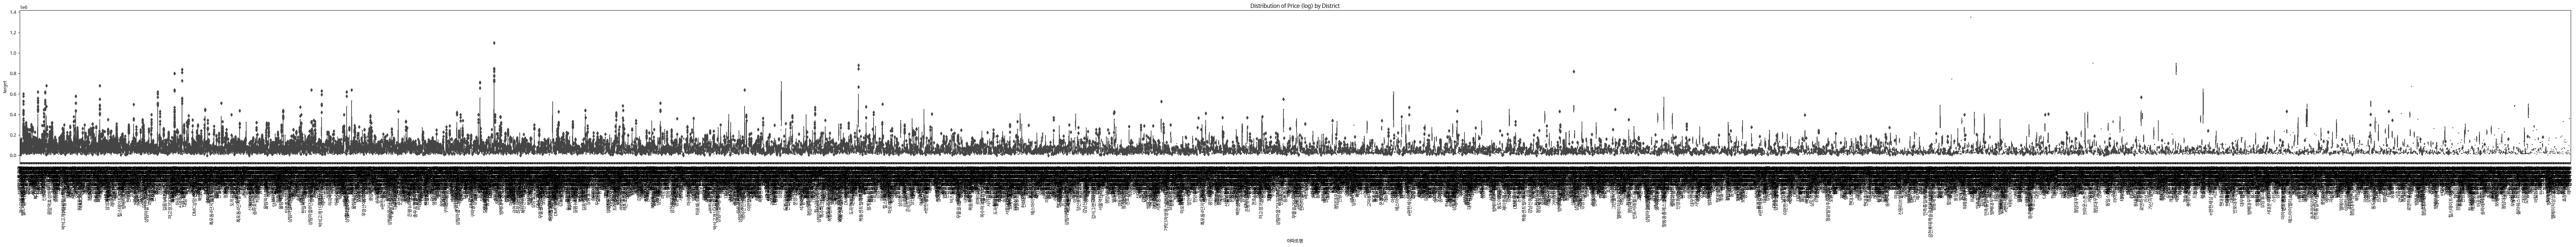

In [26]:
# [동]: 반포동, 한남동,  압구정동, 청담동, 도곡동, 성수동1가, 삼성동, 잠실동, 대치동
# [구]: 용산구, 서초구, 강남구, 송파구
# [단지분류]: 아파트, 주상복합
# [세대타입]: 분양, 기타
# [복도유형]: 계단식, 혼합식, 타워형
# [난방방식]: 개별난방, 지역난방
# [건설사]: 삼성물산, GS건설, 대림건설, 금호건설, 청담삼익아파트, (주)대림산업,  대림산업 (주), 현대건설,삼성물산,현대산업개발, 현대,쌍용,GS, 두산중공업,  삼익건설,   중앙건설,    삼성물산, 현대산업개발,     대림,삼성,현대,현산, 대림산업,   지에스건설(주)
# [관리비업로드]: Y
# [계약년]: 2014년이전, 14년~19년, 20년이후 


# 무의미: 관리방식, 거래유형, 고용보험관리번호, 경비비관리형태, 세대전기계약방법, 기의임임, 청소비관리형태, 중개사소재지
plt.figure(figsize=(100, 6))
sns.boxplot(data=sampled_data, x='아파트명', y='target')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Distribution of Price (log) by District')
plt.show()


# plt.figure(figsize=(12, 6))
# sns.violinplot(data=sampled_data, x='계약월', y='target', inner='box')
# plt.xticks(rotation=45)
# plt.title('Price Distribution (log) by District with Box Plot')
# plt.show()

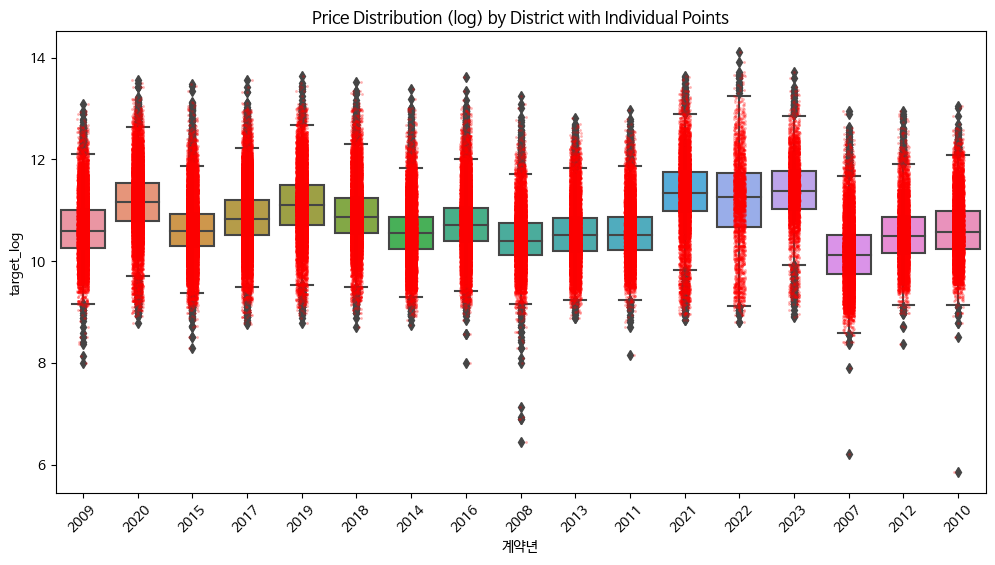

In [69]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=sampled_data, x='계약년', y='target_log', whis=1.5)
sns.stripplot(data=sampled_data, x='계약년', y='target_log', color='red', alpha=0.3, size=2)
plt.xticks(rotation=45)
plt.title('Price Distribution (log) by District with Individual Points')
plt.show()

In [19]:
print("연속형 변수:", continuous_columns)
print("범주형 변수:", categorical_columns)


연속형 변수: ['본번', '부번', '전용면적', '계약일', '층', '건축년도', '해제사유발생일', '단지소개기존clob', '전체동수', '전체세대수', '연면적', '주거전용면적', '관리비부과면적', '전용면적60', '전용면적60_85', '전용면적85_135', '전용면적135', '건축면적', '주차대수', '좌표X', '좌표Y', 'target', 'is_test', 'target_log']
범주형 변수: ['번지', '아파트명', '도로명', '등기신청일자', '거래유형', '중개사소재지', '단지분류', '전화번호', '팩스번호', '세대타입', '관리방식', '복도유형', '난방방식', '건설사', '시행사', '사용검사일_사용승인일', '홈페이지', '등록일자', '수정일자', '고용보험관리번호', '경비비관리형태', '세대전기계약방법', '청소비관리형태', '기의임임', '단지승인일', '사용허가여부', '관리비업로드', '단지신청일', '구', '동', '계약년', '계약월']


In [20]:
# 5. Feature importance를 간단히 확인 (선형회귀 기준)
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# 주요 수치형 변수들 선택
numeric_features = ['주거전용면적', '전용면적', '층', '전체동수', '전체세대수']
X = sampled_data[numeric_features]
y = sampled_data['target_log']

# 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=numeric_features)

# 선형 회귀로 feature importance 확인
model = LinearRegression()
model.fit(X_scaled, y)

# Feature importance 시각화
importance_df = pd.DataFrame({
    'feature': numeric_features,
    'importance': abs(model.coef_)
})
importance_df = importance_df.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='importance', y='feature')
plt.title('Feature Importance (Based on Linear Regression Coefficients)')
plt.show()

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [19]:
# 4. 통계적 분석
from scipy import stats

# Pearson 상관계수와 p-value 계산
correlation, p_value = stats.pearsonr(sampled_data['연면적'], sampled_data['target'])
print(f"Pearson 상관계수: {correlation:.4f}")
print(f"P-value: {p_value:.4f}")


Pearson 상관계수: nan
P-value: nan


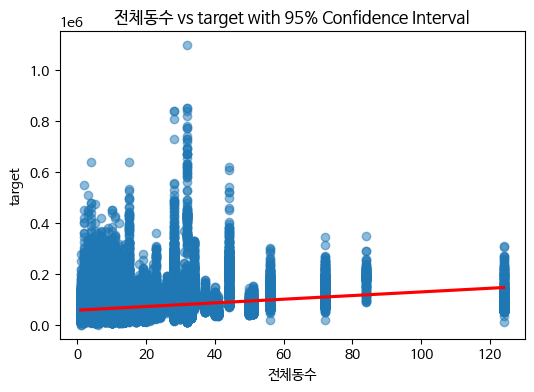

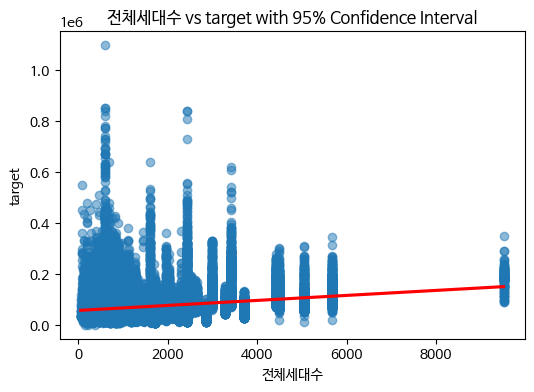

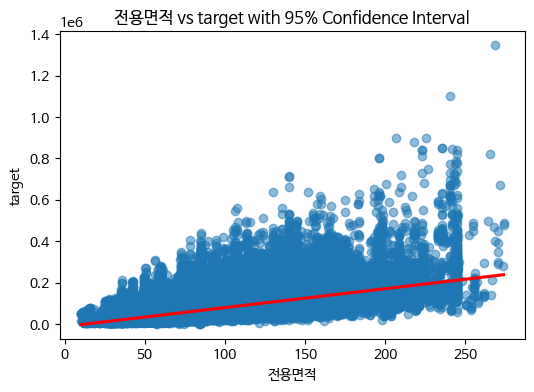

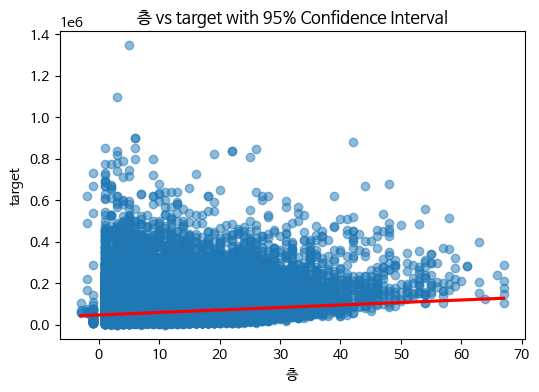

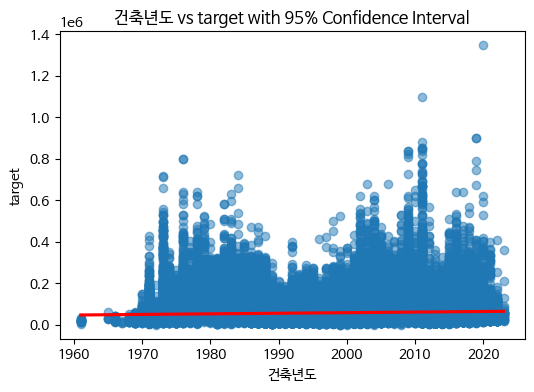

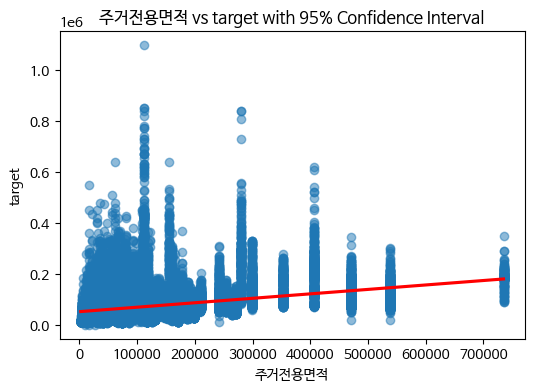

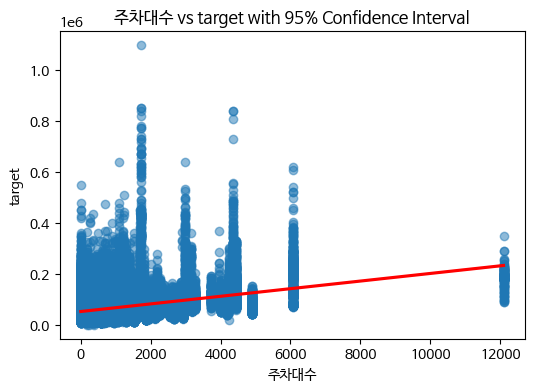

In [42]:
X = ['전체동수', '전체세대수', '전용면적','층', '건축년도', '주거전용면적', '주차대수']
y = 'target'
for x in X:
    plt.figure(figsize=(6, 4))
    sns.regplot(data=sampled_data,
                x=x,
                y=y,
                scatter_kws={'alpha':0.5},
                line_kws={'color': 'red'},
                ci=95)  # 95% confidence interval
    plt.title(f'{x} vs {y} with 95% Confidence Interval')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

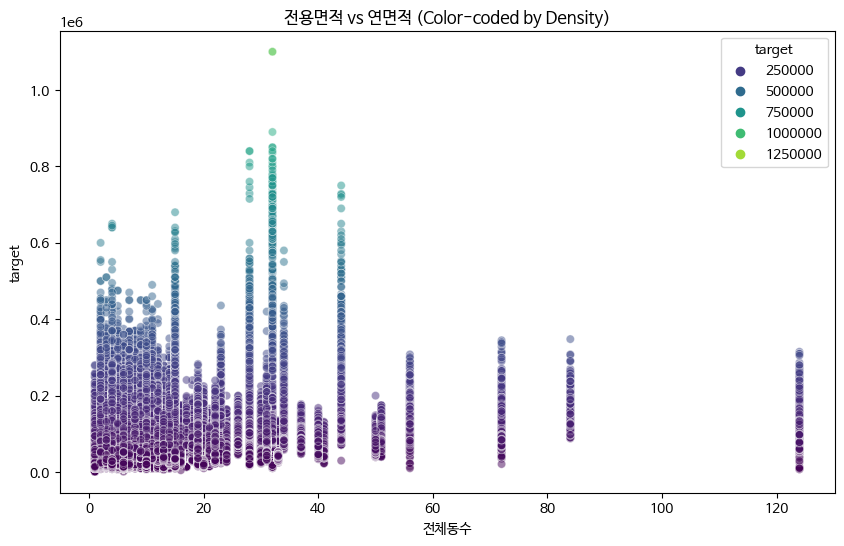

In [36]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=concat,
                x='전체동수',
                y='target',
                alpha=0.5,
                hue='target',  # Color points based on y-value
                palette='viridis')
plt.title('전용면적 vs 연면적 (Color-coded by Density)')
plt.xlabel('전체동수')
plt.ylabel('target')
plt.show()

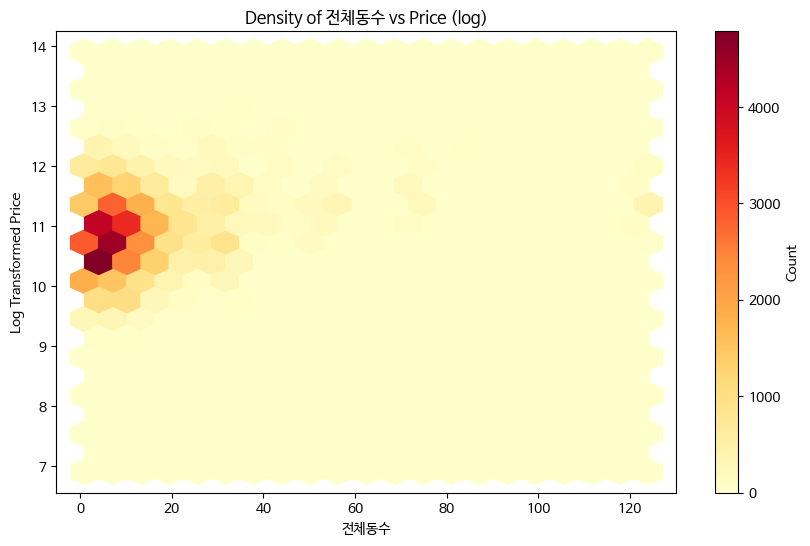

In [21]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=sampled_data,
            x='전용면적',  # Your numeric feature
            y='target_log',
            cmap='viridis',
            fill=True)
plt.title('Density Plot of Price vs Area')
plt.show()

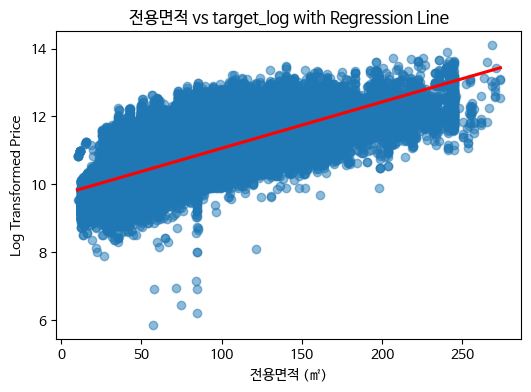

In [15]:
plt.figure(figsize=(6, 4))
sns.regplot(data=sampled_data, 
            x='전용면적', 
            y='target_log',
            scatter_kws={'alpha':0.5},  # Add transparency to points
            line_kws={'color': 'red'})  # Regression line color
plt.title('전용면적 vs target_log with Regression Line')
plt.xlabel('전용면적 (㎡)')
plt.ylabel('Log Transformed Price')
plt.show()

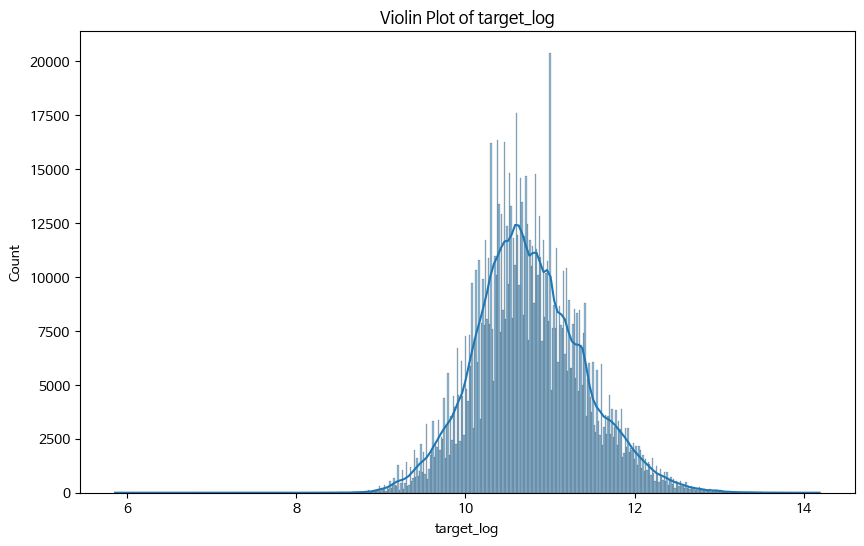

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(data=concat, x='target_log', kde=True)
plt.title('Violin Plot of target_log')
plt.show()

In [ ]:
# 실제로 결측치라고 표시는 안되어있지만 아무 의미도 갖지 않는 element들이 아래와 같이 존재합니다.
# 아래 3가지의 경우 모두 아무 의미도 갖지 않는 element가 포함되어 있습니다.
display(concat['등기신청일자'].value_counts())

In [ ]:
display(concat['거래유형'].value_counts())

In [ ]:
display(concat['중개사소재지'].value_counts())

In [ ]:
# 위 처럼 아무 의미도 갖지 않는 칼럼은 결측치와 같은 역할을 하므로, np.nan으로 채워 결측치로 인식되도록 합니다.
concat['등기신청일자'] = concat['등기신청일자'].replace(' ', np.nan)
concat['거래유형'] = concat['거래유형'].replace('-', np.nan)
concat['중개사소재지'] = concat['중개사소재지'].replace('-', np.nan)

In [ ]:
# EDA에 앞서 결측치를 확인해보겠습니다.
concat.isnull().sum()

In [ ]:
# 변수별 결측치의 비율을 plot으로 그려보면 아래와 같습니다.
fig = plt.figure(figsize=(13, 2))
missing = concat.isnull().sum() / concat.shape[0]
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar(color='orange')
plt.title('변수별 결측치 비율')
plt.show()

- 위 그래프에서 볼 수 있다시피 결측치가 100만개 이상인 칼럼들은 결측치가 해당 칼럼의 element 중 90% 이상을 차지하는 상황이 됩니다.
- 따라서 본 Baseline 에서는 이 칼럼은 예측에 도움이 되지 않는다고 판단해 삭제해주도록 하겠습니다.

In [ ]:
# Null값이 100만개 이상인 칼럼은 삭제해보도록 하겠습니다.
print('* 결측치가 100만개 이하인 변수들 :', list(concat.columns[concat.isnull().sum() <= 1000000]))     # 남겨질 변수들은 아래와 같습니다.
print('* 결측치가 100만개 이상인 변수들 :', list(concat.columns[concat.isnull().sum() >= 1000000]))

In [ ]:
# 위에서 결측치가 100만개 이하인 변수들만 골라 새로운 concat_select 객체로 저장해줍니다.
selected = list(concat.columns[concat.isnull().sum() <= 1000000])
concat_select = concat[selected]

In [ ]:
concat_select.isnull().sum()     # 결측치가 100만개 초과인 칼럼이 제거된 모습은 아래와 같습니다.
# target변수는 test dataset 개수만큼(9272) 결측치가 존재함을 확인할 수 있습니다.

In [ ]:
# 연속형 변수는 선형보간을 해주고, 범주형변수는 알수없기에 “unknown”이라고 임의로 보간해 주겠습니다.
concat_select.info()

In [ ]:
# 본번, 부번의 경우 float로 되어있지만 범주형 변수의 의미를 가지므로 object(string) 형태로 바꾸어주고 아래 작업을 진행하겠습니다.
concat_select['본번'] = concat_select['본번'].astype('str')
concat_select['부번'] = concat_select['부번'].astype('str')

In [ ]:
# 먼저, 연속형 변수와 범주형 변수를 위 info에 따라 분리해주겠습니다.
continuous_columns = []
categorical_columns = []

for column in concat_select.columns:
    if pd.api.types.is_numeric_dtype(concat_select[column]):
        continuous_columns.append(column)
    else:
        categorical_columns.append(column)

print("연속형 변수:", continuous_columns)
print("범주형 변수:", categorical_columns)

- 연속형 변수와 범주형 변수가 알맞게 나누어졌는지 확인해보고, 이제 각각 보간을 진행합니다.

In [ ]:
# 범주형 변수에 대한 보간
concat_select[categorical_columns] = concat_select[categorical_columns].fillna('NULL')

# 연속형 변수에 대한 보간 (선형 보간)
concat_select[continuous_columns] = concat_select[continuous_columns].interpolate(method='linear', axis=0)

In [ ]:
concat_select.isnull().sum()         # 결측치가 보간된 모습을 확인해봅니다.

- Baseline에서는 단순 결측치들을 제거하거나 보간했지만,
EDA를 통해 변수들의 흐름을 조금 더 파악하고 더 나은 interpolation 등의 방법을 고려해볼 수 있을 것 같습니다.

### 3.2. 이상치 처리
- 이번엔 이상치를 처리해봅시다.
- 이상치를 처리하는 방법은 IQR, Z-score 등 다양한 방법이 있습니다. 가장 쉽고 직관적으로 접근하는 방법은 기본 통계치를 이용하는 것입니다.
- 본 baseline에서는 IQR를 이용한 방법을 사용하겠습니다.

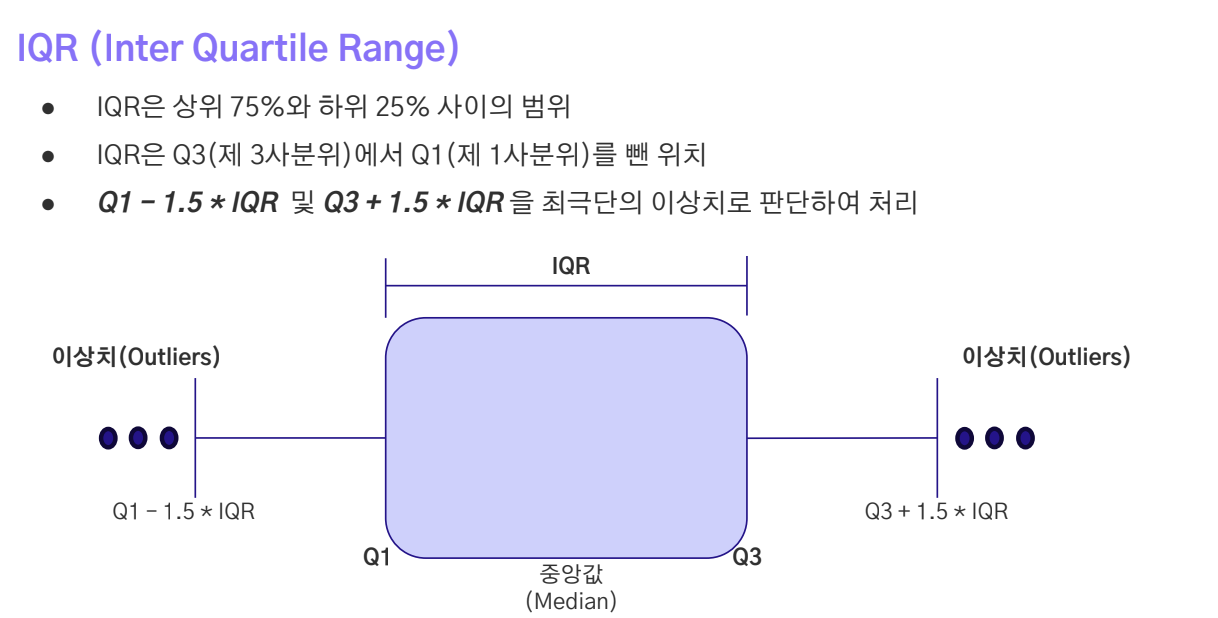

In [ ]:
# 이상치 제거 이전의 shape은 아래와 같습니다.
print(concat_select.shape)

In [ ]:
# 대표적인 연속형 변수인 “전용 면적” 변수 관련한 분포를 먼저 살펴보도록 하겠습니다.
fig = plt.figure(figsize=(7, 3))
sns.boxplot(data = concat_select, x = '전용면적', color='lightgreen')
plt.title('전용면적 분포')
plt.xlabel('Area')
plt.show()

In [ ]:
# 이상치 제거 방법에는 IQR을 이용하겠습니다.
def remove_outliers_iqr(dt, column_name):
    df = dt.query('is_test == 0')       # train data 내에 있는 이상치만 제거하도록 하겠습니다.
    df_test = dt.query('is_test == 1')

    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

    result = pd.concat([df, df_test])   # test data와 다시 합쳐주겠습니다.
    return result

In [ ]:
# 위 방법으로 전용 면적에 대한 이상치를 제거해보겠습니다.
concat_select = remove_outliers_iqr(concat_select, '전용면적')

In [ ]:
# 이상치 제거 후의 shape은 아래와 같습니다. 약 10만개의 데이터가 제거된 모습을 확인할 수 있습니다.
print(concat_select.shape)

In [ ]:
concat_select['is_test'].value_counts()     # 또한, train data만 제거되었습니다.

## 4. Feature Engineering
- 이제 파생변수를 만들어보도록 하겠습니다.
- 파생 변수는 도메인 지식에 기반해 제작하는 것이 중요합니다.
- 주택의 가격을 예측하는 문제이기 때문에 약간의 부동산 지식을 기반으로 파생 변수를 만들어 보도록 하겠습니다.

In [ ]:
# 시군구, 년월 등 분할할 수 있는 변수들은 세부사항 고려를 용이하게 하기 위해 모두 분할해 주겠습니다.
concat_select['구'] = concat_select['시군구'].map(lambda x : x.split()[1])
concat_select['동'] = concat_select['시군구'].map(lambda x : x.split()[2])
del concat_select['시군구']

concat_select['계약년'] = concat_select['계약년월'].astype('str').map(lambda x : x[:4])
concat_select['계약월'] = concat_select['계약년월'].astype('str').map(lambda x : x[4:])
del concat_select['계약년월']

In [ ]:
concat_select.columns

- 서울의 집값은 강남, 강북 여부에 따라 차이가 많이 난다는 사실은 많이 알려진 사실입니다.
- 따라서 강남/강북의 여부에 따라 파생변수를 생성해주도록 하겠습니다.

In [ ]:
all = list(concat_select['구'].unique())
gangnam = ['강서구', '영등포구', '동작구', '서초구', '강남구', '송파구', '강동구']
gangbuk = [x for x in all if x not in gangnam]

assert len(all) == len(gangnam) + len(gangbuk)       # 알맞게 분리되었는지 체크합니다.

In [ ]:
# 강남의 여부를 체크합니다.
is_gangnam = []
for x in concat_select['구'].tolist() :
  if x in gangnam :
    is_gangnam.append(1)
  else :
    is_gangnam.append(0)

# 파생변수를 하나 만릅니다.
concat_select['강남여부'] = is_gangnam

In [ ]:
concat_select.columns

- 또한 신축인지, 구축인지의 여부도 실거래가에 큰 영향을 줄 수 있습니다.
- 따라서 건축년도에 따라 파생변수를 제작해주도록 하겠습니다.

In [ ]:
# 건축년도 분포는 아래와 같습니다. 특히 2005년이 Q3에 해당합니다.
# 2009년 이후에 지어진 건물은 10%정도 되는 것을 확인할 수 있습니다.
concat_select['건축년도'].describe(percentiles = [0.1, 0.25, 0.5, 0.75, 0.8, 0.9])

In [ ]:
# 따라서 2009년 이후에 지어졌으면 비교적 신축이라고 판단하고, 신축 여부 변수를 제작해보도록 하겠습니다.
concat_select['신축여부'] = concat_select['건축년도'].apply(lambda x: 1 if x >= 2009 else 0)

In [ ]:
concat_select.head(1)       # 최종 데이터셋은 아래와 같습니다.

In [ ]:
concat_select.shape

- 위 두 사항 외에도 외부 공공 데이터를 이용하거나, EDA를 통해 더 많은 변수를 제작할 수 있습니다.

## 5. Model Training

- 이제 위에서 만든 파생변수들과 정제한 데이터를 기반으로 본격적으로 부동산 실거래가를 예측하는 모델링을 진행하겠습니다.
- 모델링에는 `sklearn`의 `RandomForest`를 이용하도록 하겠습니다.

- 참고 ✅
  - `RandomForest`는 배깅(Bagging)의 일종으로, 학습시키는 데이터 뿐 아니라 특성변수(X)들도 무작위로 선택해 트리를 생성하는 방법입니다.
  - 모델 학습 과정에서 서로 다른 N개의 Tree 생성하고, N개의 Tree에서 발생한 Output을 Voting(범주형, 분류문제)하거나, Average(연속형, 회귀문제)해 최종 Output 생성합니다.
  - 이는 High variance, Low bias 상황에서 분산(Variance) 감소에 도움을 줍니다.

In [ ]:
# 이제 다시 train과 test dataset을 분할해줍니다. 위에서 제작해 놓았던 is_test 칼럼을 이용합니다.
dt_train = concat_select.query('is_test==0')
dt_test = concat_select.query('is_test==1')

# 이제 is_test 칼럼은 drop해줍니다.
dt_train.drop(['is_test'], axis = 1, inplace=True)
dt_test.drop(['is_test'], axis = 1, inplace=True)
print(dt_train.shape, dt_test.shape)

In [ ]:
dt_test.head(1)

In [ ]:
# dt_test의 target은 일단 0으로 임의로 채워주도록 하겠습니다.
dt_test['target'] = 0

### 5.1. 범주형 변수 Encoding
- 범주형 변수는 그대로 모델에 투입하면, 모델이 제대로 작동할 수 없습니다.
- 따라서 **레이블 인코딩 과정**을 통해 범주형 변수들을 numeric하게 바꾸는 인코딩 과정을 진행해주도록 하겠습니다.

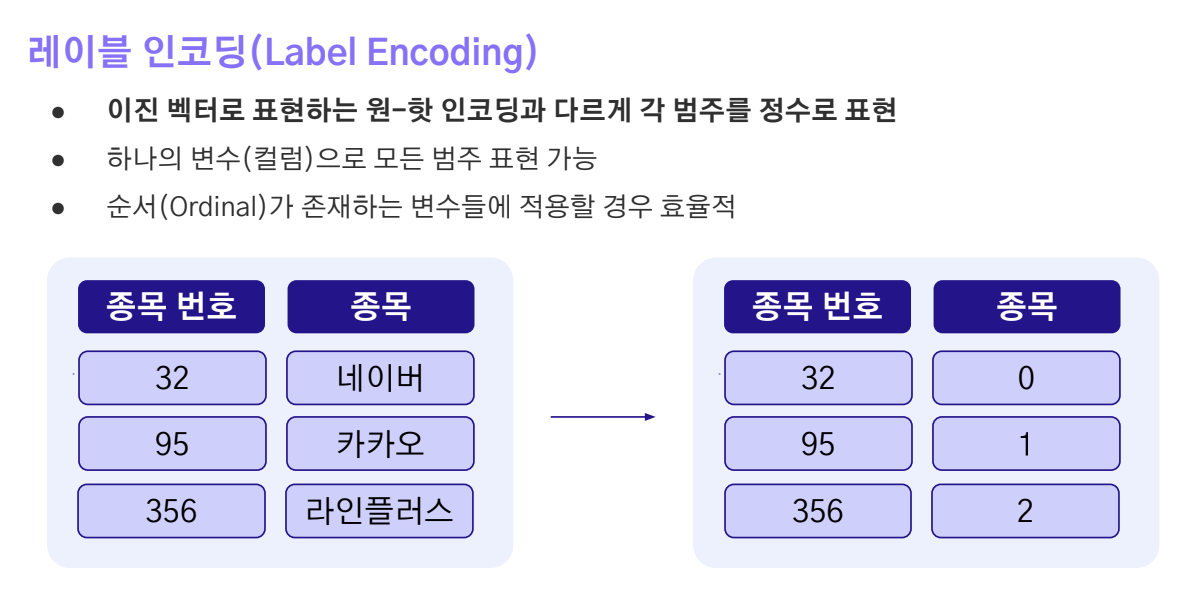

In [ ]:
# 파생변수 제작으로 추가된 변수들이 존재하기에, 다시한번 연속형과 범주형 칼럼을 분리해주겠습니다.
continuous_columns_v2 = []
categorical_columns_v2 = []

for column in dt_train.columns:
    if pd.api.types.is_numeric_dtype(dt_train[column]):
        continuous_columns_v2.append(column)
    else:
        categorical_columns_v2.append(column)

print("연속형 변수:", continuous_columns_v2)
print("범주형 변수:", categorical_columns_v2)

In [ ]:
# 아래에서 범주형 변수들을 대상으로 레이블인코딩을 진행해 주겠습니다.

# 각 변수에 대한 LabelEncoder를 저장할 딕셔너리
label_encoders = {}

# Implement Label Encoding
for col in tqdm( categorical_columns_v2 ):
    lbl = LabelEncoder()

    # Label-Encoding을 fit
    lbl.fit( dt_train[col].astype(str) )
    dt_train[col] = lbl.transform(dt_train[col].astype(str))
    label_encoders[col] = lbl           # 나중에 후처리를 위해 레이블인코더를 저장해주겠습니다.

    # Test 데이터에만 존재하는 새로 출현한 데이터를 신규 클래스로 추가해줍니다.
    for label in np.unique(dt_test[col]):
      if label not in lbl.classes_: # unseen label 데이터인 경우
        lbl.classes_ = np.append(lbl.classes_, label) # 미처리 시 ValueError발생하니 주의하세요!

    dt_test[col] = lbl.transform(dt_test[col].astype(str))

In [ ]:
dt_train.head(1)        # 레이블인코딩이 된 모습입니다.

### 5.2. Model Training
- 위 데이터를 이용해 모델을 train 해보겠습니다. 모델은 RandomForest를 이용하겠습니다.
- Train과 Valid dataset을 분할하는 과정에서는 `holdout` 방법을 사용하겠습니다. 이 방법의 경우  대략적인 성능을 빠르게 확인할 수 있다는 점에서 baseline에서 사용해보도록 하겠습니다.
  - 이 후 추가적인 eda를 통해서 평가세트와 경향을 맞추거나 kfold와 같은 분포에 대한 고려를 추가할 수 있습니다.

In [ ]:
assert dt_train.shape[1] == dt_test.shape[1]          # train/test dataset의 shape이 같은지 확인해주겠습니다.

In [ ]:
# Target과 독립변수들을 분리해줍니다.
y_train = dt_train['target']
X_train = dt_train.drop(['target'], axis=1)

# Hold out split을 사용해 학습 데이터와 검증 데이터를 8:2 비율로 나누겠습니다.
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=2023)

In [ ]:
# RandomForestRegressor를 이용해 회귀 모델을 적합시키겠습니다.
model = RandomForestRegressor(n_estimators=5, criterion='squared_error', random_state=1, n_jobs=-1)
model.fit(X_train, y_train)
pred = model.predict(X_val)

- 랜덤포레스트의 하이퍼파라미터도 데이터에 맞게 지정해줄 수 있습니다. 데이터에 맞는 하이퍼파라미터를 찾는 것도 성능 향상에 도움이 될 수 있습니다.

In [ ]:
# 회귀 관련 metric을 통해 train/valid의 모델 적합 결과를 관찰합니다.
print(f'RMSE test: {np.sqrt(metrics.mean_squared_error(y_val, pred))}')

- 변수 중요도도 확인해보도록 하겠습니다.

In [ ]:
# 위 feature importance를 시각화해봅니다.
importances = pd.Series(model.feature_importances_, index=list(X_train.columns))
importances = importances.sort_values(ascending=False)

plt.figure(figsize=(10,8))
plt.title("Feature Importances")
sns.barplot(x=importances, y=importances.index)
plt.show()

In [ ]:
# 학습된 모델을 저장합니다. Pickle 라이브러리를 이용하겠습니다.
with open('saved_model.pkl', 'wb') as f:
    pickle.dump(model, f)

### 5.3. Feature selection

- 어떤 변수가 유용한 변수인지 확인해보기 위해 permutation selection을 이용해보겠습니다.

In [ ]:
# Permutation importance 방법을 변수 선택에 이용해보겠습니다.
perm = PermutationImportance(model,        # 위에서 학습된 모델을 이용하겠습니다.
                             scoring = "neg_mean_squared_error",        # 평가 지표로는 회귀문제이기에 negative rmse를 사용합니다. (neg_mean_squared_error : 음의 평균 제곱 오차)
                             random_state = 42,
                             n_iter=3).fit(X_val, y_val)
eli5.show_weights(perm, feature_names = X_val.columns.tolist())    # valid data에 대해 적합시킵니다.

- 분석 결과 "계약년", "전용면적" 변수가 유의한 변수로 보입니다. 따라서 이 변수로 또 다른 파생변수를 더 생성해보거나, 중요도가 낮아보이는 변수를 제거해 차원의 저주를 막아볼 수도 있습니다.

### 5.4. Valid prediction 분석

- 예측값을 분석해보기 위해 valid prediction을 확인해보겠습니다.

In [ ]:
# Validation dataset에 target과 pred 값을 채워주도록 하겠습니다.
X_val['target'] = y_val
X_val['pred'] = pred

In [ ]:
# Squared_error를 계산하는 함수를 정의하겠습니다.
def calculate_se(target, pred):
    squared_errors = (target - pred) ** 2
    return squared_errors

# RMSE 계산
squared_errors = calculate_se(X_val['target'], X_val['pred'])
X_val['error'] = squared_errors

In [ ]:
# Error가 큰 순서대로 sorting 해 보겠습니다.
X_val_sort = X_val.sort_values(by='error', ascending=False)       # 내림차순 sorting

In [ ]:
X_val_sort.head()

- 예측을 잘 하지 못한 top 100개의 데이터와 예측을 잘한 top 100개의 데이터를 비교해보겠습니다.

In [ ]:
X_val_sort_top100 = X_val.sort_values(by='error', ascending=False).head(100)        # 예측을 잘 하지못한 top 100개의 data
X_val_sort_tail100 = X_val.sort_values(by='error', ascending=False).tail(100)       # 예측을 잘한 top 100개의 data

In [ ]:
# 해석을 위해 레이블인코딩 된 변수를 복원해줍니다.
error_top100 = X_val_sort_top100.copy()
for column in categorical_columns_v2 :     # 앞서 레이블 인코딩에서 정의했던 categorical_columns_v2 범주형 변수 리스트를 사용합니다.
    error_top100[column] = label_encoders[column].inverse_transform(X_val_sort_top100[column])

best_top100 = X_val_sort_tail100.copy()
for column in categorical_columns_v2 :     # 앞서 레이블 인코딩에서 정의했던 categorical_columns_v2 범주형 변수 리스트를 사용합니다.
    best_top100[column] = label_encoders[column].inverse_transform(X_val_sort_tail100[column])

In [ ]:
display(error_top100.head(1))
display(best_top100.head(1))

- 이제 분포를 비교해보도록 하겠습니다.

In [ ]:
sns.boxplot(data = error_top100, x='target')
plt.title('The worst top100 prediction의 target 분포')
plt.show()

sns.boxplot(data = best_top100, x='target', color='orange')
plt.title('The best top100 prediction의 target 분포')
plt.show()

- Taget 분포를 보니 좋은 예측을 보인 top 100개의 data보다 상대적으로 나쁜 예측을 보인 top 100 dataset들이 높은 가격을 보였음을 확인할 수 있습니다. 이에 대한 모델링 및 처리가 필요해보입니다.

In [ ]:
sns.histplot(data = error_top100, x='전용면적', alpha=0.5)
sns.histplot(data = best_top100, x='전용면적', color='orange', alpha=0.5)
plt.title('전용면적 분포 비교')
plt.show()

- 전용면적 또한 나쁜 예측을 보인 집들이 더 넓음을 확인할 수 있습니다.

## 6. Inference

In [ ]:
dt_test.head(2)      # test dataset에 대한 inference를 진행해보겠습니다.

In [ ]:
# 저장된 모델을 불러옵니다.
with open('saved_model.pkl', 'rb') as f:
    model = pickle.load(f)

In [ ]:
%%time
X_test = dt_test.drop(['target'], axis=1)

# Test dataset에 대한 inference를 진행합니다.
real_test_pred = model.predict(X_test)

In [ ]:
real_test_pred          # 예측값들이 출력됨을 확인할 수 있습니다.

## 7. Output File Save

In [ ]:
# 앞서 예측한 예측값들을 저장합니다.
preds_df = pd.DataFrame(real_test_pred.astype(int), columns=["target"])
preds_df.to_csv('output.csv', index=False)